# 2주차 과제
## 사용한 데이터셋 : winequality-red
#### 설명 변수 : volatile acidity, alcohol
#### 종속 변수 : quality

In [54]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [29]:
# 데이터 불러오기
data_url = "/Users/ogjaeeun/Downloads/winequality-red.csv"

In [51]:
data = pd.read_csv(data_url, skiprows=1, header=None)
data.columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
                'free sulfur dioxide','total sulfur dioxide','density','pH', 'sulphates', 'alcohol', 'quality']
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [52]:
X = data[['volatile acidity', 'alcohol']] 
y = data['quality']
X, y

(      volatile acidity  alcohol
 0                0.700      9.4
 1                0.880      9.8
 2                0.760      9.8
 3                0.280      9.8
 4                0.700      9.4
 ...                ...      ...
 1594             0.600     10.5
 1595             0.550     11.2
 1596             0.510     11.0
 1597             0.645     10.2
 1598             0.310     11.0
 
 [1599 rows x 2 columns],
 0       5
 1       5
 2       5
 3       6
 4       5
        ..
 1594    5
 1595    6
 1596    6
 1597    5
 1598    6
 Name: quality, Length: 1599, dtype: int64)

In [57]:
# 훈련 세트
# X_train = data[['volatile acidity', 'alcohol']].iloc[:1439]
# y_train = data['quality'].iloc[:1439]

# 테스트 세트 
# X_test = data[['volatile acidity', 'alcohol']].iloc[1439:]
# y_test = data['quality'].iloc[1439:]

# X_train, X_test

(      volatile acidity  alcohol
 0                0.700      9.4
 1                0.880      9.8
 2                0.760      9.8
 3                0.280      9.8
 4                0.700      9.4
 ...                ...      ...
 1434             0.540      9.0
 1435             0.540      9.0
 1436             0.380      8.5
 1437             0.915     11.1
 1438             0.590     10.3
 
 [1439 rows x 2 columns],
       volatile acidity    alcohol
 1439             0.670  11.066667
 1440             0.370  11.300000
 1441             0.785   9.566667
 1442             0.630   9.800000
 1443             0.580  11.700000
 ...                ...        ...
 1594             0.600  10.500000
 1595             0.550  11.200000
 1596             0.510  11.000000
 1597             0.645  10.200000
 1598             0.310  11.000000
 
 [160 rows x 2 columns])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42) # 9:1 비율로 나누기
X_train, X_test

(      volatile acidity  alcohol
 1125             0.240     11.3
 1144             0.320     10.1
 1058             0.530     11.6
 629              0.685      9.3
 1350             0.600     10.0
 ...                ...      ...
 1130             0.600     10.4
 1294             0.635     10.9
 860              0.620      9.5
 1459             0.200     11.9
 1126             0.290     13.5
 
 [1439 rows x 2 columns],
       volatile acidity  alcohol
 803               0.56      9.6
 124               0.50      9.5
 350               0.67      9.9
 682               0.46      9.8
 1326              0.46     10.6
 ...                ...      ...
 1522              0.32     10.6
 297               0.63      9.6
 405               0.31     10.1
 1378              0.45      9.9
 1049              0.50     10.8
 
 [160 rows x 2 columns])

In [58]:
model = LinearRegression()
model.fit(X_train, y_train) # trainset으로 fitting

LinearRegression()

In [59]:
model.intercept_

3.081250462085353

In [60]:
model.coef_

array([-1.36034681,  0.31469111])

In [71]:
def predict(x, model=None):
    return sum(model.coef_ * x) + model.intercept_

y_pred = predict(data[['volatile acidity', 'alcohol']].iloc[1004], model=model)
y_pred

5.73761974670903

In [69]:
model.predict(data[['volatile acidity', 'alcohol']].iloc[1004].values.reshape(1, -1))[0]

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


5.73761974670903

In [73]:
model.score(X_test, y_test) # testset의 결정계수 확인

0.2607504899259707

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

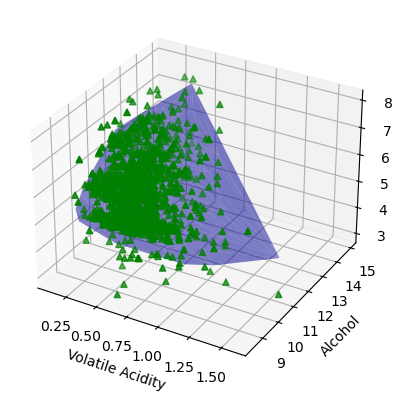

In [80]:
# 회귀식 계수 및 절편
w1, w2 = model.coef_
b = model.intercept_

# 회귀식 함수 정의
def regression_func(x, y):
    return w1 * x + w2 * y + b

# 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 훈련 데이터를 이용한 회귀식 평면 그리기
x = X_train['volatile acidity']
y = X_train['alcohol']
z = regression_func(x, y)
ax.scatter(x, y, y_train, color='g', marker='^')  # 실제 데이터
ax.plot_trisurf(x, y, z, color='b', alpha=0.5)  # 회귀식 평면 그리기

ax.set_xlabel('Volatile Acidity')
ax.set_ylabel('Alcohol')
ax.set_zlabel('Quality')

plt.show()
